In [2]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [3]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [4]:
Y_train[8]

array([5], dtype=uint8)

In [5]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [6]:
X_train.shape

(35000, 32, 32, 3)

In [7]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')
img_height = 180
img_width = 180
image_size=(img_height, img_width)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


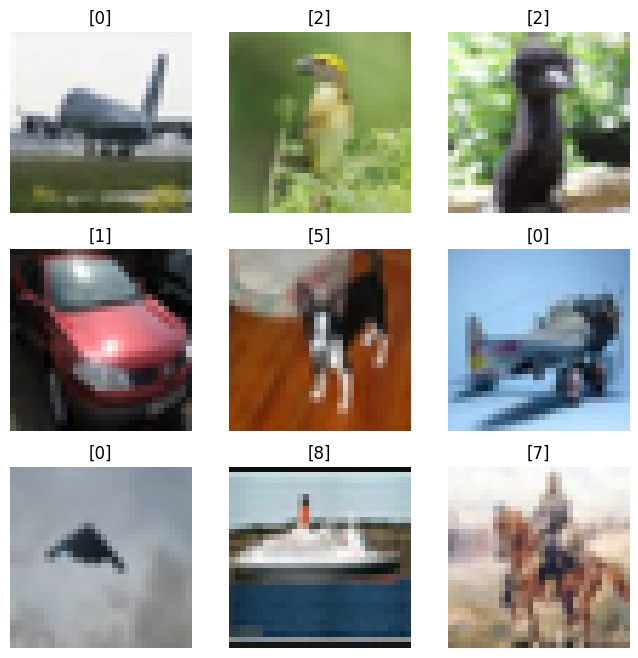

In [8]:
import random
figure = plt.figure(figsize=(8,8))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [9]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

"\nYou have got some experience form last assignment '\nUse that experience this time\n"

In [10]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [31]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the 
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: Batch Normalization is a method used by deep neural networks to make themselves faster and more efficient. It consists of normalizing activation vectors from hidden layers 
using mean and variance of the current batch of the dataset. This normalization step is applied right either before or after the nonlinear function. At each layer, the function 
calculates the mean and variance and uses the statistical interpretations to calculate a quantity(norm) which helps in normalisation. 

Znorm= (Z- mean)/(variance- constant) where Z represents the sum of all the datapoints used to calc. mean. Znorm is the normalized function

Further a linear  function Z"= Y*Znorm+ B is created

by applying a linear transformation with Y and B, two trainable parameters. Such step allows the model to choose the optimum distribution for each hidden layers, 
by adjusting those two parameters :

Y  adjusts the standard deviation.
B  adjusts the bias, shifting the curve on the right or on the left side.

At each epoch, the NN computes the mean and the standard deviation corresponding to the current batch. Then it trains Y and B through gradient descent.

While viewing an example on the mnist dataset I saw,
Without Batch Normalization, the activated values fluctuate a lot during the first epoch. After BN, the curve turned out smoother

 It also seems to make the convergence of the model easier.








"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: Batch Normalization is a method used by deep neural networks to make themselves faster and more efficient. It consists of normalizing activation vectors from hidden layers \nusing mean and variance of the current batch of the dataset. This normalization step is applied right either before or after the nonlinear function. At each layer, the function \ncalculates the mean and variance and uses the statistical interpretations to calculate a quantity(norm) which helps in normalisation. \n\nZnorm= (Z- mean)/(variance- constant) where Z represents the sum of all the datapoints used to calc. mean. Znorm is the normalized function\n\nFurther a linear  function Z"= Y*Znorm+ B is created\n\nby applying a linear transformation with Y and B, two trainable parameters. Such step allows the model to choose the optimum distribution f

In [12]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [26]:
# model initialization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
model = Sequential()
    
model.add(layers.Conv2D(32,4 , activation = 'relu', input_shape=(32,32,3))),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(16,4 , activation = 'relu', kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(8,4 , activation = 'relu',kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Flatten()),
model.add(layers.Dense(56, activation = 'relu',kernel_regularizer='l2')),



# 

# Intermediate layers



















# final layer 
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [27]:
model.build((32,32,3)) 
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 16)        8208      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 8)           2056      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 8)         

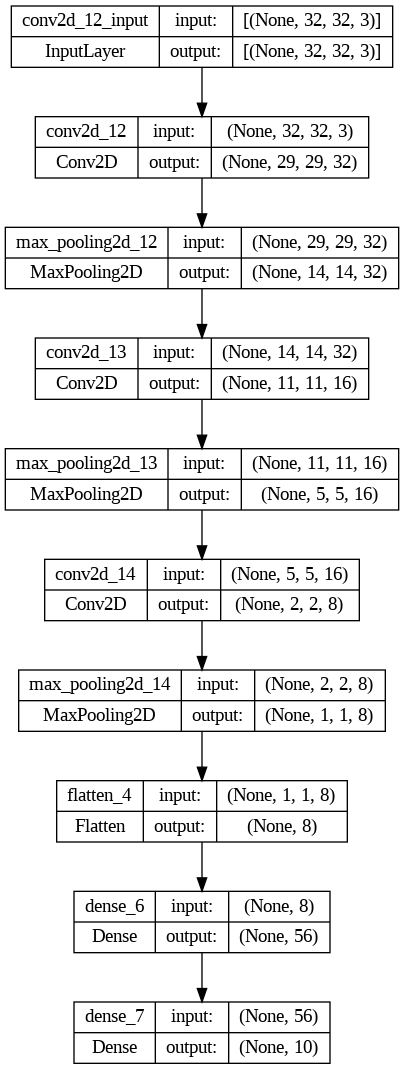

In [28]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

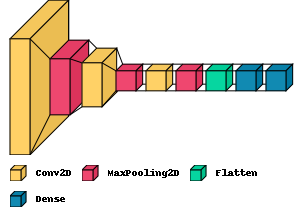

In [22]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [29]:
"""
In the last part of the assignment 
try experimenting with learning rate.
May be decreasing the lr might had help?
"""
#lr=10e-6 fits best
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [30]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=8,validation_data = validation_data)

Epoch 1/8
1094/1094 [==============================] - 84s 76ms/step - loss: 2.4408 - accuracy: 0.4467 - val_loss: 2.2266 - val_accuracy: 0.3523
Epoch 2/8
1094/1094 [==============================] - 74s 68ms/step - loss: 2.1586 - accuracy: 0.1628 - val_loss: 2.1161 - val_accuracy: 0.1291
Epoch 3/8
1094/1094 [==============================] - 68s 62ms/step - loss: 2.0950 - accuracy: 0.1276 - val_loss: 2.0779 - val_accuracy: 0.1939
Epoch 4/8
1094/1094 [==============================] - 72s 66ms/step - loss: 2.0576 - accuracy: 0.1256 - val_loss: 2.0414 - val_accuracy: 0.0361
Epoch 5/8
1094/1094 [==============================] - 73s 67ms/step - loss: 2.0331 - accuracy: 0.1083 - val_loss: 2.0207 - val_accuracy: 0.1670
Epoch 6/8
1094/1094 [==============================] - 72s 66ms/step - loss: 2.0123 - accuracy: 0.1048 - val_loss: 2.0127 - val_accuracy: 0.0443
Epoch 7/8
1094/1094 [==============================] - 67s 61ms/step - loss: 1.9869 - accuracy: 0.0927 - val_loss: 1.9730 - val_ac

In [ ]:
plt.plot(history.history['accuracy'],
         label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [ ]:
#MODEL-1
model.add(layers.Flatten(input_shape=(32,32,3))),
model.add(layers.Dense(512, activation='relu')),
model.add(layers.Dense(256, activation='relu')),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(32, activation='relu')),


#MODEL-2
model.add(layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(32,32,3))),
model.add(layers.MaxPooling2D()),
model.add(BatchNormalization()),
model.add(LeakyReLU()),
model.add(layers.Conv2D(16, 3, padding='same', activation='relu')),
model.add(layers.MaxPooling2D()),
model.add(BatchNormalization()),
model.add(LeakyReLU()),
model.add(layers.Conv2D(8, 3, padding='same', activation='relu')),
model.add(layers.MaxPooling2D()),
model.add(BatchNormalization()),
model.add(LeakyReLU()),
model.add(layers.Flatten()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dense(64, activation='relu')),

#MODEL-3
model.add(layers.Conv2D(32,3 , activation = 'relu', input_shape=(32,32,3))),
model.add((layers.AveragePooling2D())),
model.add(layers.Conv2D(16,3 , activation = 'relu')),
model.add((layers.AveragePooling2D())),
model.add(layers.Conv2D(8,3 , activation = 'relu'))
model.add((layers.AveragePooling2D())),
model.add(layers.Flatten()),
model.add(layers.Dense(32, activation = 'relu')),

#model-4
model.add(layers.Conv2D(32,4 , activation = 'relu', input_shape=(32,32,3))),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(16,4 , activation = 'relu', kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(8,4 , activation = 'relu',kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Flatten()),
model.add(layers.Dense(56, activation = 'relu',kernel_regularizer='l2')),

#MODEL-5
    
model.add(layers.Conv2D(32,4 , activation = 'relu', input_shape=(32,32,3))),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(16,4 , activation = 'relu', kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Conv2D(8,4 , activation = 'relu',kernel_regularizer='l2')),
model.add((layers.MaxPooling2D())),
model.add(layers.Flatten()),
model.add(layers.Dense(56, activation = 'relu',kernel_regularizer='l2')),


